In [1]:
from scipy.io import netcdf
import numpy
import netCDF4
import pandas
import aacgmv2
import xarray
%pylab inline

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Populating the interactive namespace from numpy and matplotlib


In [2]:
ampFName = "../data/20110516.0000.86400.120.north.grd.ncdf"
selDate = datetime.datetime( 2011, 5, 16, 8, 28 )

In [3]:
# currDataSet = netCDF4.Dataset(ampFName)
# currDataSet.variables.keys()

In [4]:
# # get the variables into a DF
# nlon = currDataSet.variables["nlon"][:]
# nlat = currDataSet.variables["nlat"][:]
# # start time vars
# start_yr = currDataSet.variables["start_yr"][:]
# start_mo = currDataSet.variables["start_mo"][:]
# start_dy = currDataSet.variables["start_dy"][:]
# start_hr = currDataSet.variables["start_hr"][:]
# start_mt = currDataSet.variables["start_mt"][:]
# start_sc = currDataSet.variables["start_sc"][:]
# # end time vars
# end_yr = currDataSet.variables["end_yr"][:]
# end_mo = currDataSet.variables["end_mo"][:]
# end_dy = currDataSet.variables["end_dy"][:]
# end_hr = currDataSet.variables["end_hr"][:]
# end_mt = currDataSet.variables["end_mt"][:]
# end_sc = currDataSet.variables["end_sc"][:]
# # measurements
# Jr = currDataSet.variables["Jr"][:]
# dBr = currDataSet.variables["dBr"][:]
# dBnorth1 = currDataSet.variables["dBnorth1"][:]
# dBeast1 = currDataSet.variables["dBeast1"][:]
# dBnorth2 = currDataSet.variables["dBnorth2"][:]
# dBeast2 = currDataSet.variables["dBeast2"][:]
# mlt = currDataSet.variables["mlt"][:]
# var = currDataSet.variables["colat"][:]
# print var.shape

In [5]:
dsXarr = xarray.open_dataset(ampFName)
ampDF = dsXarr.to_dataframe()
ampDF["start_date"] = pandas.to_datetime( dict(year=ampDF.start_yr,\
                    month=ampDF.start_mo, day=ampDF.start_dy,\
                    hour=ampDF.start_hr, minute=ampDF.start_mt,\
                    second=ampDF.start_sc))
ampDF["end_date"] = pandas.to_datetime( dict(year=ampDF.end_yr,\
                    month=ampDF.end_mo, day=ampDF.end_dy,\
                    hour=ampDF.end_hr, minute=ampDF.end_mt,\
                    second=ampDF.end_sc))
ampDF["mlat"] = 90. - ampDF["colat"]
selCols = ['start_date', 'end_date', 'mlat',\
           'mlt', 'dBnorth1', 'dBeast1',\
       'dBnorth2', 'dBeast2', 'dBr', 'Jr']
ampDF = ampDF[selCols].reset_index(drop=True)

ampDF.head()

,start_date,end_date,mlat,mlt,dBnorth1,dBeast1,dBnorth2,dBeast2,dBr,Jr
0,2011-05-16,2011-05-16 00:10:00,89.0,0.0,82.529999,60.080002,76.720001,67.349998,-2.50,-0.21
1,2011-05-16,2011-05-16 00:10:00,88.0,0.0,80.660004,31.370001,76.199997,41.020000,-2.55,-0.27
2,2011-05-16,2011-05-16 00:10:00,87.0,0.0,61.980000,1.050000,61.169998,10.080000,4.62,-0.28
3,2011-05-16,2011-05-16 00:10:00,86.0,0.0,32.880001,-19.570000,35.610001,-13.990000,13.99,-0.25
4,2011-05-16,2011-05-16 00:10:00,85.0,0.0,9.180000,-25.520000,13.440000,-23.559999,22.02,-0.18


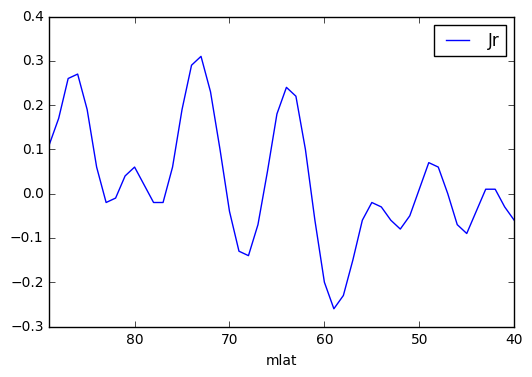

In [6]:
selDF = ampDF[ (ampDF["start_date"] == selDate) &\
                (ampDF["mlt"] == 22.) ]
selDF.plot( x="mlat", y="Jr" )